In [16]:
function forward_difference(f, x, h)
    return (f(x + h) - f(x)) / h
end

function backward_difference(f, x, h)
    return (f(x) - f(x - h)) / h
end

function centered_difference(f, x, h)
   return (f(x + h) - f(x - h)) / (2*h)
end

centered_difference (generic function with 1 method)

In [17]:
function richardson_extrapolation(f, x, h; es=1e-6, max_levels=10)
    approx_prev = NaN
    errors = Float64[]
    levels = Int[]
    approx_current = 0.0

    for level in 1:max_levels

        D=zeros(level, level)
        for i in 1:level
            hi = h / 2 ^ (i - 1)
            D[i, 1] = (f(x + hi) - f(x - hi)) / (2*hi)
        end
        for j in 2:level
            for i in j:level
                D[i, j] = (4^(j-1) * D[i, j-1] - D[i - 1, j - 1] / 4 ^ (j-1) - 1)
            end
        end

        approx_current = D[level,level]
        
        if level > 1
            error_est = abs(approx_current - approx_prev) * 100 / approx_current
            push!(errors, error_est)
            push!(levels, level)
            println("Level $level: Approximation = $approx_current, Successive Error = $error_est")
            if error_est < es
                println("Tolerance reached at level $level.")
                return approx_current, level, errors, levels
            end
        else
            push!(errors, 100.0)
            push!(levels, level)
            println("Level $level: Approximation = $approx_current")
        end
        approx_prev = approx_current
    end
        println("Maximum levels reached without meeting tolerance.")
        return approx_current, max_levels, errors, levels
end

richardson_extrapolation (generic function with 1 method)

Level 1: Approximation = 8.683627547364312
Level 2: Approximation = 27.632312674620557, Successive Error = 68.57437287418958
Level 3: Approximation = 428.31080542153245, Successive Error = 93.54853710790098
Level 4: Approximation = 27229.63598731228, Successive Error = 98.42704175104983
Level 5: Approximation = 6.959518117353531e6, Successive Error = 99.60874250877492
Level 6: Approximation = 7.123682625706835e9, Successive Error = 99.90230448936286
Level 7: Approximation = 2.917567660652217e13, Successive Error = 99.97558348784236
Level 8: Approximation = 4.780023001203955e17, Successive Error = 99.99389633133582
Level 9: Approximation = 3.1326162393767524e22, Successive Error = 99.9984741115298
Level 10: Approximation = 8.211952647118281e27, Successive Error = 99.9996185296757
Maximum levels reached without meeting tolerance.

 Final Richardson extrapolation estimate: 8.211952647118281e27


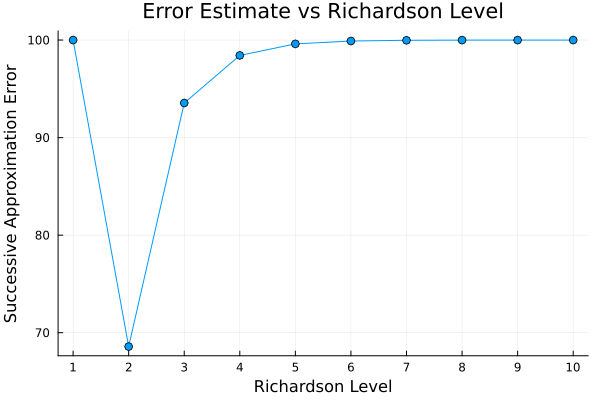

In [ ]:
using Plots

f(x) = MathConstants.e ^ x
x0 = 2.0
h = 1

approx, level, errors, levels = richardson_extrapolation(f, x0, h)
println("\n Final Richardson extrapolation estimate: ", approx)
plot(levels, errors, marker=:o, xlabel="Richardson Level", ylabel="Successive Approximation Error", title="Error Estimate vs Richardson Level", legend=false, xticks=levels)

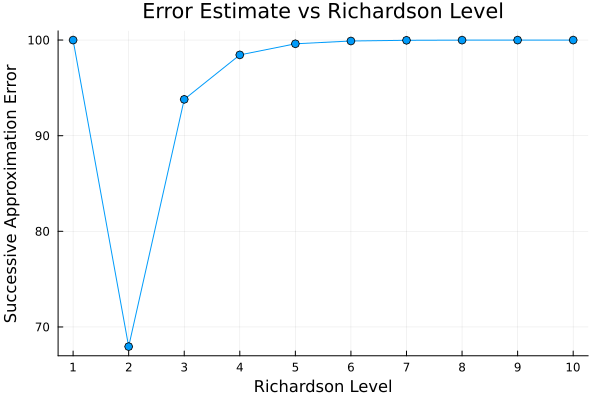

Derivative of sin(x) at: 0.0
Level 1: Approximation = 0.8414709848078965
Level 2: Approximation = 2.62503656263165, Successive Error = 67.94440897370566
Level 3: Approximation = 42.33594447515977, Successive Error = 93.79950867950551
Level 4: Approximation = 2731.463507843004, Successive Error = 98.45006369832149
Level 5: Approximation = 700753.5099356384, Successive Error = 99.61021051352367
Level 6: Approximation = 7.179575792149068e8, Successive Error = 99.9023962515025
Level 7: Approximation = 2.94115001815607e12, Successive Error = 99.97558922276039
Level 8: Approximation = 4.818942352457898e16, Successive Error = 99.99389668976501
Level 9: Approximation = 3.1581686310508246e21, Successive Error = 99.99847413393157
Level 10: Approximation = 8.278966990077149e26, Successive Error = 99.99961853107582
Maximum levels reached without meeting tolerance.

 Final Richardson extrapolation estimate: 8.278966990077149e26
Derivative of sin(x) at: 3.141592653589793
Level 1: Approximation = -0.

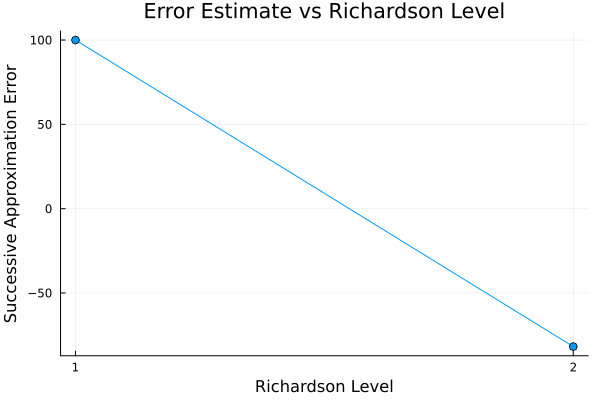

In [21]:
using Plots

f(x) = sin(x)
h = 1

for x0 in [0.0, pi]
    println("Derivative of sin(x) at: ", x0)
    approx, level, errors, levels = richardson_extrapolation(f, x0, h)
    println("\n Final Richardson extrapolation estimate: ", approx)
    display(plot(levels, errors, marker=:o, xlabel="Richardson Level", ylabel="Successive Approximation Error", title="Error Estimate vs Richardson Level", legend=false, xticks=levels))
end

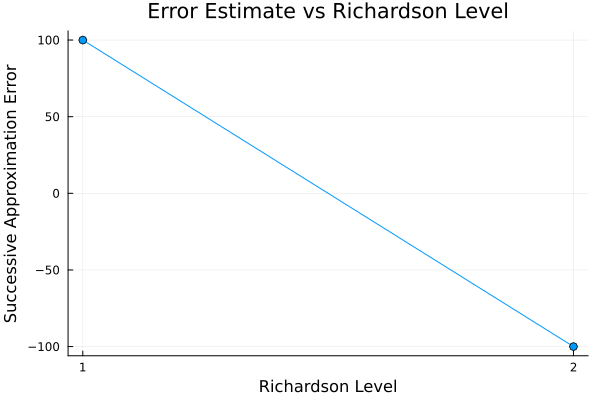

Derivative of sin(x) at: 0.0
Level 1: Approximation = 0.0
Level 2: Approximation = -1.0, Successive Error = -100.0
Tolerance reached at level 2.

 Final Richardson extrapolation estimate: -1.0
Derivative of sin(x) at: 3.141592653589793
Level 1: Approximation = -5.551115123125783e-17
Level 2: Approximation = -1.0000000000000004, Successive Error = -100.0
Tolerance reached at level 2.

 Final Richardson extrapolation estimate: -1.0000000000000004


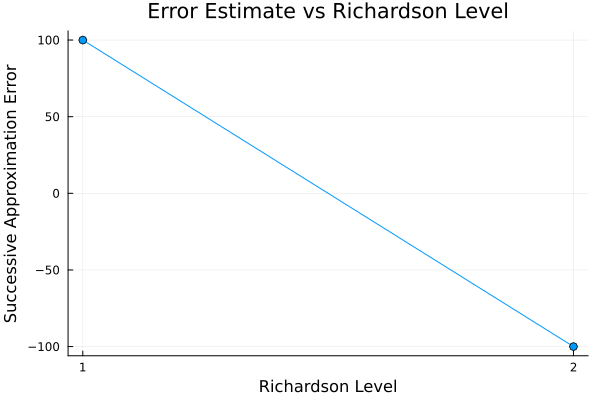

In [22]:
f(x) = cos(x)
h = 1

for x0 in [0.0, pi]
    println("Derivative of sin(x) at: ", x0)
    approx, level, errors, levels = richardson_extrapolation(f, x0, h)
    println("\n Final Richardson extrapolation estimate: ", approx)
    display(plot(levels, errors, marker=:o, xlabel="Richardson Level", ylabel="Successive Approximation Error", title="Error Estimate vs Richardson Level", legend=false, xticks=levels))
end